In [8]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [20]:
data = pd.read_csv('data/ChicagoCrime2022.csv')

In [21]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12787319,JF348814,08/02/2022 07:00:00 AM,134XX S BALTIMORE AVE,0810,THEFT,OVER $500,STREET,False,False,433,4.0,10.0,55.0,06,1199105.0,1816541.0,2022,11/12/2022 03:46:21 PM,41.651396,-87.547160,"(41.651396287, -87.547160289)"
1,12785177,JF346161,08/06/2022 03:10:00 AM,001XX N WALLER AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,True,1512,15.0,29.0,25.0,07,1138134.0,1900556.0,2022,11/12/2022 03:46:21 PM,41.883258,-87.768226,"(41.883258475, -87.768226315)"
2,12786775,JF347931,08/07/2022 02:00:00 PM,055XX S THROOP ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,713,7.0,16.0,67.0,02,1168605.0,1867976.0,2022,11/12/2022 03:46:21 PM,41.793251,-87.657276,"(41.793250772, -87.65727644)"
3,12782006,JF342093,08/02/2022 08:30:00 PM,046XX N COMMONS DR,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,False,1614,16.0,38.0,76.0,08A,1119004.0,1929960.0,2022,11/12/2022 03:46:21 PM,41.964271,-87.837851,"(41.964271422, -87.837850654)"
4,12785982,JF347124,08/06/2022 09:00:00 PM,060XX W GIDDINGS ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,1622,16.0,38.0,15.0,14,1135123.0,1930925.0,2022,11/12/2022 03:46:21 PM,41.966648,-87.778562,"(41.966648397, -87.778561589)"


In [22]:
len(data['Primary Type'].value_counts())

31

In [7]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y %I:%M:%S %p')
data['Month'] = data['Date'].dt.month
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month
0,12787319,JF348814,2022-08-02 07:00:00,134XX S BALTIMORE AVE,0810,THEFT,OVER $500,STREET,False,False,433,4.0,10.0,55.0,06,1199105.0,1816541.0,2022,11/12/2022 03:46:21 PM,41.651396,-87.547160,"(41.651396287, -87.547160289)",8
1,12785177,JF346161,2022-08-06 03:10:00,001XX N WALLER AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,True,1512,15.0,29.0,25.0,07,1138134.0,1900556.0,2022,11/12/2022 03:46:21 PM,41.883258,-87.768226,"(41.883258475, -87.768226315)",8
2,12786775,JF347931,2022-08-07 14:00:00,055XX S THROOP ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,713,7.0,16.0,67.0,02,1168605.0,1867976.0,2022,11/12/2022 03:46:21 PM,41.793251,-87.657276,"(41.793250772, -87.65727644)",8
3,12782006,JF342093,2022-08-02 20:30:00,046XX N COMMONS DR,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,False,1614,16.0,38.0,76.0,08A,1119004.0,1929960.0,2022,11/12/2022 03:46:21 PM,41.964271,-87.837851,"(41.964271422, -87.837850654)",8
4,12785982,JF347124,2022-08-06 21:00:00,060XX W GIDDINGS ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,1622,16.0,38.0,15.0,14,1135123.0,1930925.0,2022,11/12/2022 03:46:21 PM,41.966648,-87.778562,"(41.966648397, -87.778561589)",8


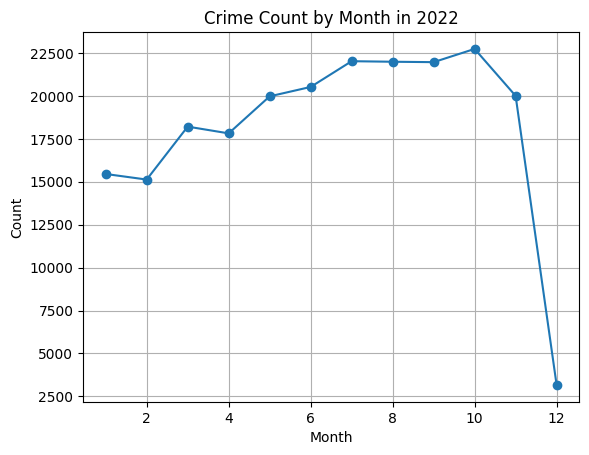

In [10]:
def show_month_cnt(data):
    grouped = data.groupby('Month').size()

    plt.plot(grouped.index, grouped.values, marker='o', linestyle='-')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.title('Crime Count by Month in 2022')
    plt.grid(True)
    plt.show()

show_month_cnt(data)

In [15]:
less_than_one_columns = grouped[grouped / grouped.sum() < 0.01].index.tolist()
less_than_one_columns

['ARSON',
 'CONCEALED CARRY LICENSE VIOLATION',
 'CRIMINAL SEXUAL ASSAULT',
 'GAMBLING',
 'HOMICIDE',
 'HUMAN TRAFFICKING',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'INTIMIDATION',
 'KIDNAPPING',
 'LIQUOR LAW VIOLATION',
 'NON-CRIMINAL',
 'OBSCENITY',
 'OFFENSE INVOLVING CHILDREN',
 'OTHER NARCOTIC VIOLATION',
 'PROSTITUTION',
 'PUBLIC INDECENCY',
 'PUBLIC PEACE VIOLATION',
 'SEX OFFENSE',
 'STALKING']

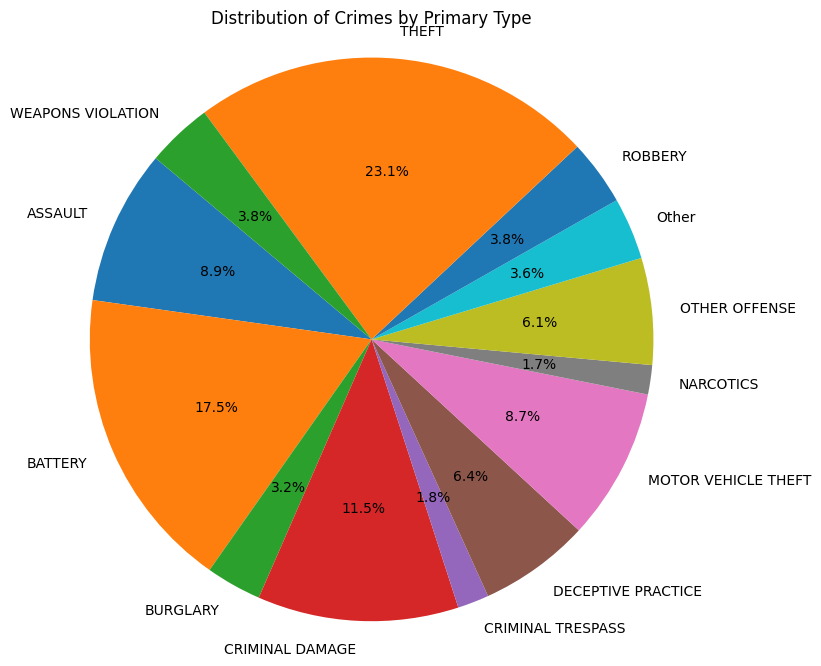

In [16]:
def type_distribution(data):
    grouped = data.groupby('Primary Type').size()
    less_than_one_columns = grouped[grouped / grouped.sum() < 0.01].index.tolist()
    data['Primary Type'] = data['Primary Type'].replace(less_than_one_columns, 'Other')

    grouped = data.groupby('Primary Type').size()

    plt.figure(figsize=(8, 8))
    plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  
    plt.title('Distribution of Crimes by Primary Type')
    plt.show()

type_distribution(data)

In [17]:
import folium
from folium.plugins import HeatMap

chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)
filtered_data = data[data['Latitude'].notnull()]
locations = filtered_data[['Latitude', 'Longitude']].sample(2000)
location_list = locations.values.tolist()

heat_map = HeatMap(location_list, radius=15, blur=25)
chicago_map.add_child(heat_map)